In [ ]:
#| hide
!pip install -Uqq nixtla

In [ ]:
#| hide 
from nixtla.utils import in_colab

In [ ]:
#| hide 
IN_COLAB = in_colab()

In [ ]:
#| hide
if not IN_COLAB:
    from nixtla.utils import colab_badge
    from dotenv import load_dotenv

# TimeGPT Quickstart

> TimeGPT is a production ready, generative pretrained transformer for time series. It's capable of accurately predicting various domains such as retail, electricity, finance, and IoT with just a few lines of code 🚀.

In [ ]:
#| echo: false
if not IN_COLAB:
    load_dotenv()
    colab_badge('docs/getting-started/2_quickstart')

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nixtla/nixtla/blob/main/nbs/docs/getting-started/2_quickstart.ipynb)

## Step 1: Create a TimeGPT account and generate your API key

* Go to [dashboard.nixtla.io](https://dashboard.nixtla.io) to activate your free trial and set up an account.
* Sign in with Google, GitHub or your email
* Create your API key by going to 'API Keys' in the menu and clicking on 'Create New API Key'
* Your new key will appear. Copy the API key using the button on the right.

<img src="https://github.com/Nixtla/nixtla/blob/main/nbs/img/dashboard.png?raw=true" alt="Dashboard for TimeGPT API keys. Keys is in the middle, with trash and copy buttons on the right." width="700" />

## Step 2: Install Nixtla

In your favorite Python development environment:

Install `nixtla` with `pip`:
    
```shell
pip install nixtla
```

## Step 3: Import the Nixtla TimeGPT client

In [ ]:
from nixtla import NixtlaClient

You can instantiate the `NixtlaClient` class providing your authentication API key. 

In [ ]:
nixtla_client = NixtlaClient(
    api_key = 'my_api_key_provided_by_nixtla'
)

In [ ]:
#| hide
if not IN_COLAB:
    nixtla_client = NixtlaClient()

Check your API key status with the `validate_api_key` method.

In [ ]:
nixtla_client.validate_api_key()

INFO:nixtla.nixtla_client:Happy Forecasting! :), If you have questions or need support, please email support@nixtla.io


True

**This will get you started, but for more secure usage, see [Setting Up your API Key](https://docs.nixtla.io/docs/getting-started-setting_up_your_api_key).**

## Step 4: Start making forecasts!

Now you can start making forecasts! Let's import an example using the classic `AirPassengers` dataset. This dataset contains the monthly number of airline passengers in Australia between 1949 and 1960. First, load the dataset and plot it:

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv')
df.head()

,timestamp,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


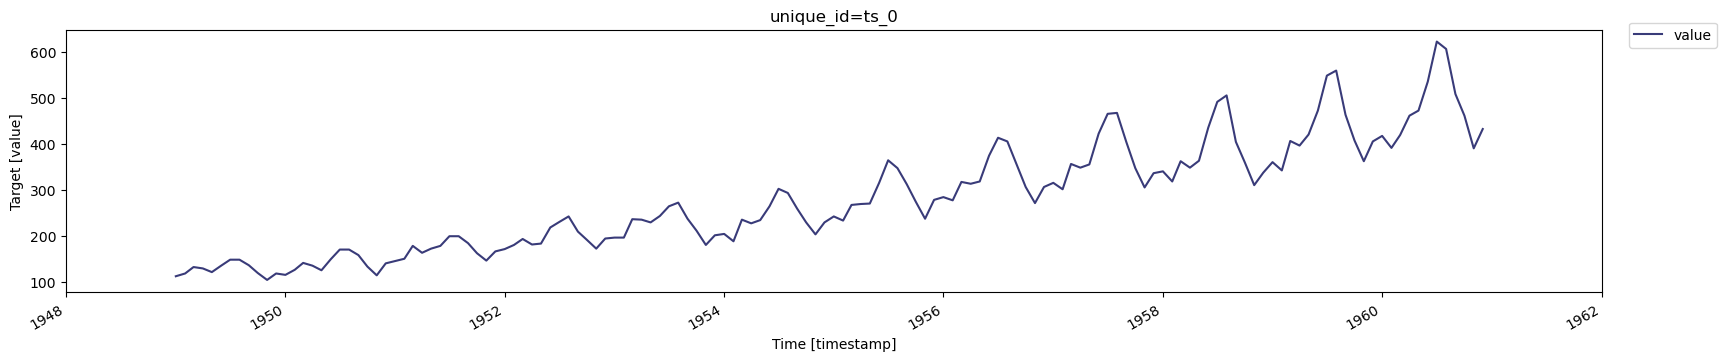

In [ ]:
nixtla_client.plot(df, time_col='timestamp', target_col='value')

> 📘 Data Requirements
>
> * Make sure the target variable column does not have missing or non-numeric values.
> * Do not include gaps/jumps in the datestamps (for the given frequency) between the first and late datestamps. The forecast function will not impute missing dates.
> * The format of the datestamp column should be readable by Pandas (see [this link](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) for more details).
>
>For further details go to [Data Requirements](https://docs.nixtla.io/docs/getting-started-data_requirements).

> 👍 Save figures made with TimeGPT
> 
> The `plot` method automatically displays figures when in a notebook environment. To save figures locally, you can do:
> 
> `fig = nixtla_client.plot(df, time_col='timestamp', target_col='value')`
>
>`fig.savefig('plot.png', bbox_inches='tight')`

### Forecast a longer horizon into the future

Next, forecast the next 12 months using the SDK `forecast` method. Set the following parameters:

- `df`: A pandas DataFrame containing the time series data.
- `h`: Horizons is the number of steps ahead to forecast.
- `freq`: The frequency of the time series in Pandas format. See [pandas’ available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases). (If you don't provide any frequency, the SDK will try to infer it)
- `time_col`: The column that identifies the datestamp.
- `target_col`: The variable to forecast.


In [ ]:
timegpt_fcst_df = nixtla_client.forecast(df=df, h=12, freq='MS', time_col='timestamp', target_col='value')
timegpt_fcst_df.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


,timestamp,TimeGPT
0,1961-01-01,437.837921
1,1961-02-01,426.062714
2,1961-03-01,463.116547
3,1961-04-01,478.244507
4,1961-05-01,505.646484


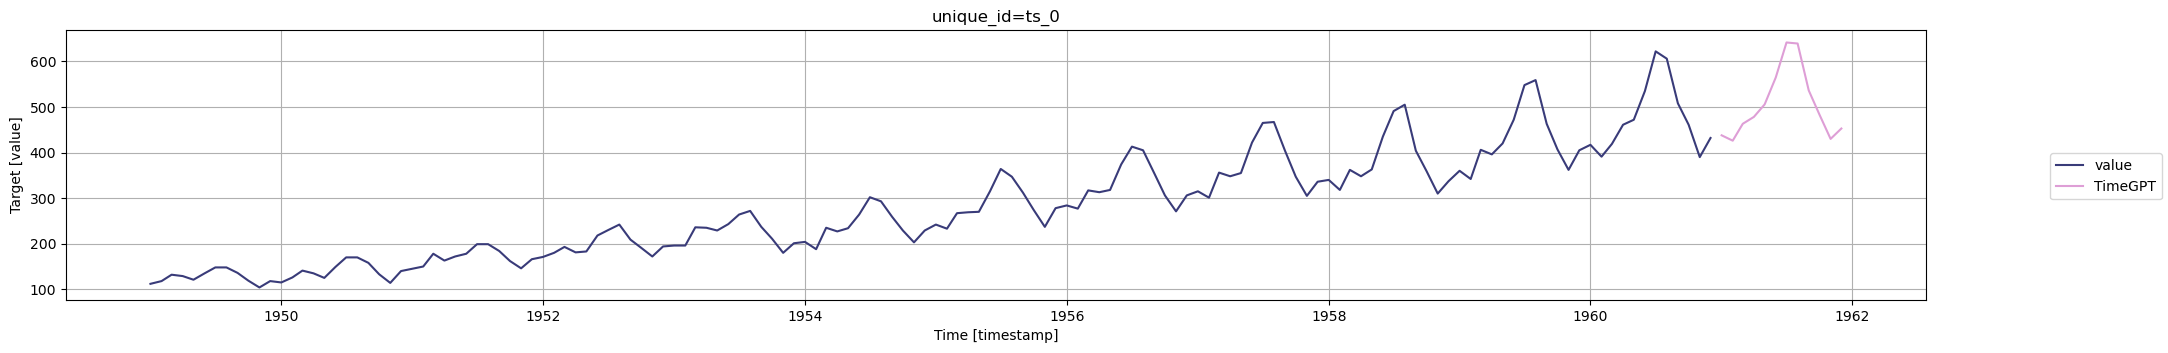

In [ ]:
nixtla_client.plot(df, timegpt_fcst_df, time_col='timestamp', target_col='value')

You can also produce longer forecasts by increasing the horizon parameter and selecting the `timegpt-1-long-horizon` model. Use this model if you want to predict more than one seasonal period of your data.

For example, let's forecast the next 36 months:


In [ ]:
timegpt_fcst_df = nixtla_client.forecast(df=df, h=36, time_col='timestamp', target_col='value', freq='MS', model='timegpt-1-long-horizon')
timegpt_fcst_df.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


,timestamp,TimeGPT
0,1961-01-01,436.843414
1,1961-02-01,419.351532
2,1961-03-01,458.943146
3,1961-04-01,477.876068
4,1961-05-01,505.656921


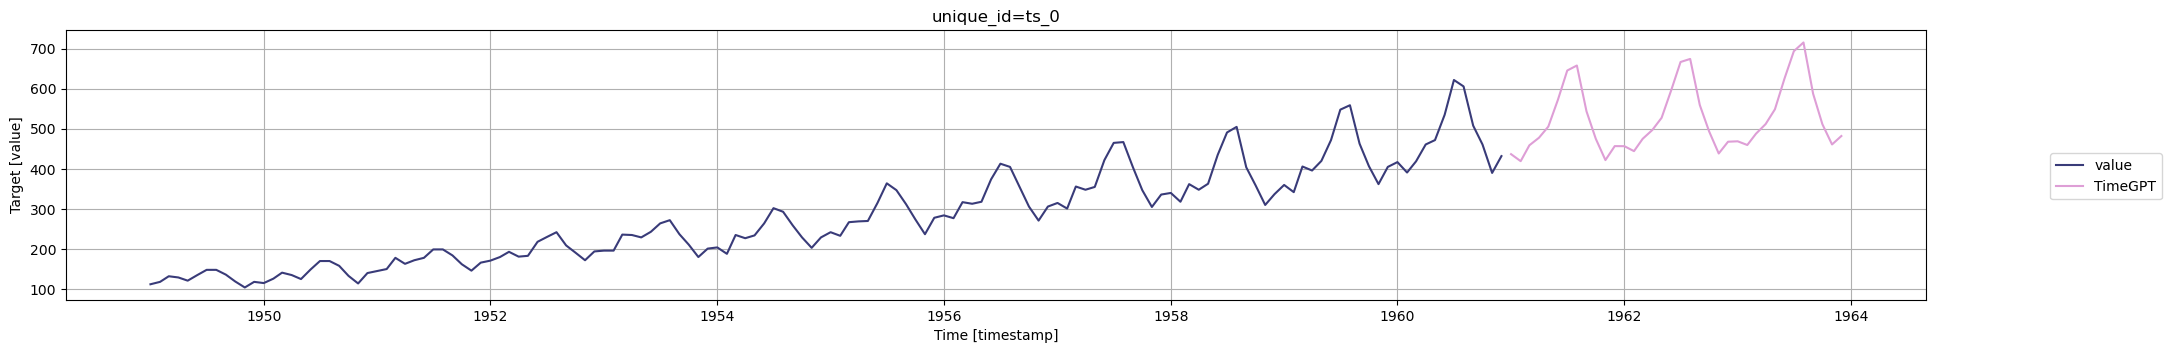

In [ ]:
nixtla_client.plot(df, timegpt_fcst_df, time_col='timestamp', target_col='value')

### Produce a shorter forecast

You can also produce a shorter forecast. For this, we recommend using the default model, `timegpt-1`. 

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


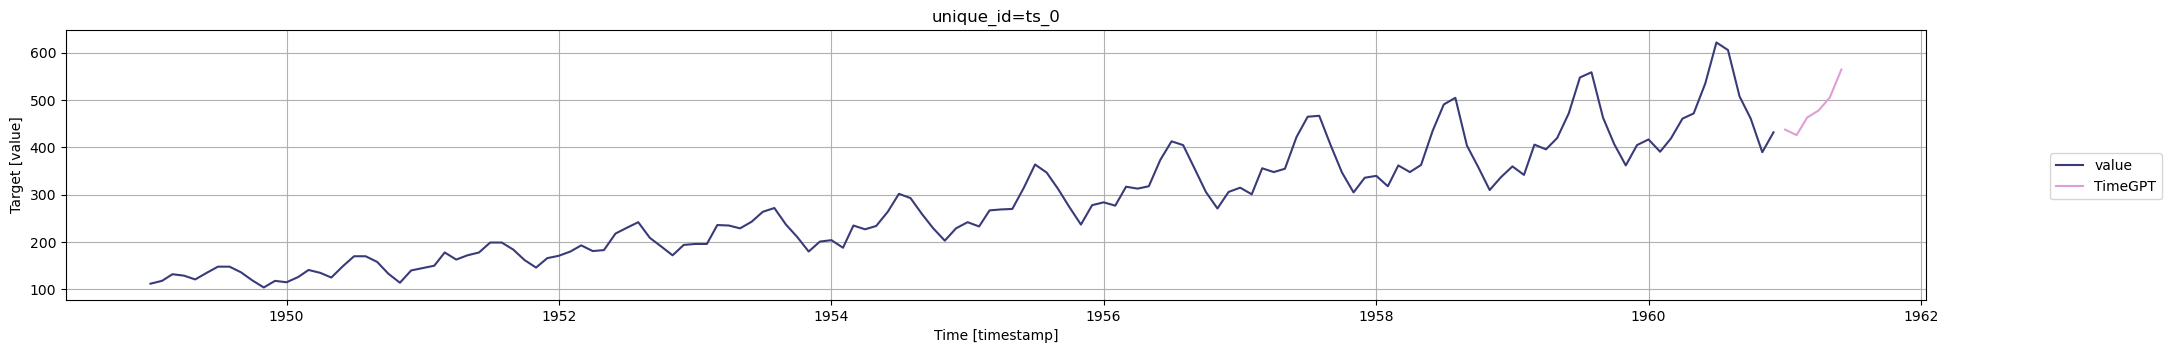

In [ ]:
timegpt_fcst_df = nixtla_client.forecast(df=df, h=6, time_col='timestamp', target_col='value', freq='MS')
nixtla_client.plot(df, timegpt_fcst_df, time_col='timestamp', target_col='value')